In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [11]:
link = r"C:\Users\paula\Desktop\Thesis\Appliances chi sqr - To download.xlsx"
df = pd.read_excel(link)

Definitions: 

Groups = IntentionNoAction, NoIntentionNoAction, IntentionAndAction

Elements = Gender, Ethnicity, Parental Status, Education, Climate Change Impact and Level of Action

### Descriptive statistics for each group and elements

In [3]:
# Descriptive Education statistics for each group
Education_stats = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Education'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Education'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Education'].describe(),
}

print(Education_stats)

{'IntentionNoAction': count    126.000000
mean       2.658730
std        0.989244
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Education, dtype: float64, 'NoIntentionNoAction': count    354.000000
mean       2.536723
std        1.007089
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Education, dtype: float64, 'IntentionAndAction': count    22.000000
mean      3.045455
std       0.898532
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Education, dtype: float64}


In [4]:
# Descriptive Climate Change impact statistics for each group
CC_impact_stats = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Climate Change Impact'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Climate Change Impact'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Climate Change Impact'].describe(),
}

print(CC_impact_stats)

{'IntentionNoAction': count    126.000000
mean       3.031746
std        0.828845
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Climate Change Impact, dtype: float64, 'NoIntentionNoAction': count    354.000000
mean       2.463277
std        0.955115
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Climate Change Impact, dtype: float64, 'IntentionAndAction': count    22.000000
mean      3.454545
std       0.911685
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       4.000000
Name: Climate Change Impact, dtype: float64}


In [5]:
# Descriptive Level of action statistics for each group
Level_action = {
    'IntentionNoAction': df[df['IntentionNoAction'] == 1]['Level of action'].describe(),
    'NoIntentionNoAction': df[df['NoIntentionNoAction'] == 1]['Level of action'].describe(),
    'IntentionAndAction': df[df['IntentionAndAction'] == 1]['Level of action'].describe(),
}

print(Level_action)

{'IntentionNoAction': count    126.000000
mean       2.230159
std        1.074525
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Level of action, dtype: float64, 'NoIntentionNoAction': count    354.000000
mean       1.844633
std        0.858972
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Level of action, dtype: float64, 'IntentionAndAction': count    22.000000
mean      1.681818
std       1.041353
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       4.000000
Name: Level of action, dtype: float64}


### Frequency distributions

In [6]:
# Frequency distribution of Education by group
education_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Education'].value_counts().unstack().fillna(0)
print("Education Distribution by Group:")
print(education_distribution_by_group)

# Frequency distribution of Climate Change Impact by group
climate_change_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Climate Change Impact'].value_counts().unstack().fillna(0)
print("\nClimate Change Impact Distribution by Group:")
print(climate_change_distribution_by_group)

# Frequency distribution of Level of Action by group
level_of_action_distribution_by_group = df.groupby(['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction'])['Level of action'].value_counts().unstack().fillna(0)
print("\nLevel of Action Distribution by Group:")
print(level_of_action_distribution_by_group)

Education Distribution by Group:
Education                                                    1     2      3  \
IntentionNoAction NoIntentionNoAction IntentionAndAction                      
0                 0                   0                    0.0   0.0    2.0   
                                      1                    2.0   2.0   11.0   
                  1                   0                   73.0  80.0  139.0   
1                 0                   0                   22.0  24.0   55.0   

Education                                                    4  
IntentionNoAction NoIntentionNoAction IntentionAndAction        
0                 0                   0                    1.0  
                                      1                    7.0  
                  1                   0                   62.0  
1                 0                   0                   25.0  

Climate Change Impact Distribution by Group:
Climate Change Impact                                   

### Chi-Square Test

In [7]:
# Define the groups as columns
groups = ['IntentionNoAction', 'NoIntentionNoAction']

# Define the sociodemographic variables
socio_vars = ['Female', '18-35', "White", "Black / African American", "USH", "Parental Status", 'Education', 'Climate Change Impact', 'Level of action']

# Dictionary to store results
results = {}

for var in socio_vars:
    print(f"\nChi-Square Test for {var} across groups:")
    for group in groups:
        # Create contingency table for each group column
        contingency_table = pd.crosstab(df[var], df[group])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check expected frequencies
        if (expected < 5).any():
            print(f"Warning: Low expected frequencies in contingency table for {var} and {group}")
        
        # Store results
        results[(var, group)] = {
            'Chi-Square Statistic': chi2_stat,
            'p-value': p_value
        }
        
        # Print results
        print(f'Group: {group}')
        print(f'Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')


Chi-Square Test for Female across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.7009, p-value: 0.1922
Group: NoIntentionNoAction
Chi-Square Statistic: 0.0383, p-value: 0.8449

Chi-Square Test for 18-35 across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.0521, p-value: 0.3050
Group: NoIntentionNoAction
Chi-Square Statistic: 0.4178, p-value: 0.5180

Chi-Square Test for White across groups:
Group: IntentionNoAction
Chi-Square Statistic: 3.8492, p-value: 0.0498
Group: NoIntentionNoAction
Chi-Square Statistic: 0.2661, p-value: 0.6059

Chi-Square Test for Black / African American across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.3283, p-value: 0.2491
Group: NoIntentionNoAction
Chi-Square Statistic: 0.0297, p-value: 0.8632

Chi-Square Test for USH across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.4677, p-value: 0.4940
Group: NoIntentionNoAction
Chi-Square Statistic: 0.6589, p-value: 0.4170

Chi-Square Test for Parental Status across groups:


### Contingency tables


Chi-Square Test for Female across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.7009, p-value: 0.1922


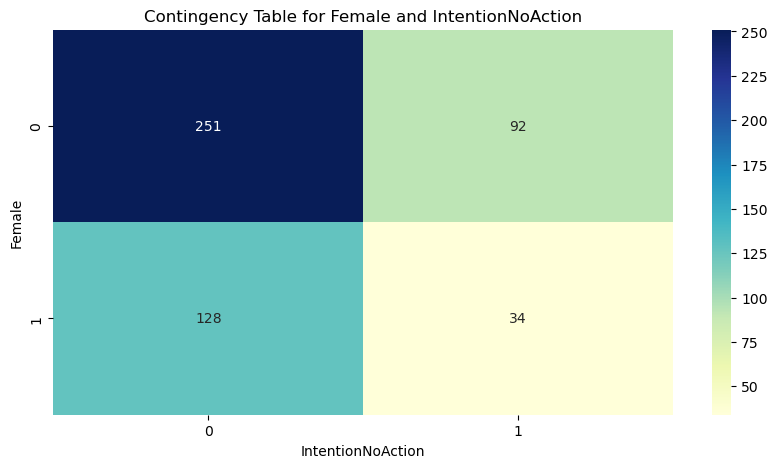

Group: NoIntentionNoAction
Chi-Square Statistic: 0.0383, p-value: 0.8449


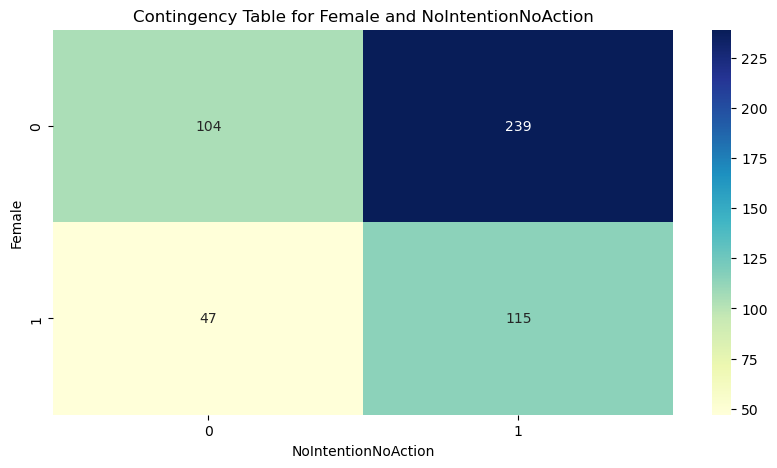

Group: IntentionAndAction
Chi-Square Statistic: 4.3049, p-value: 0.0380


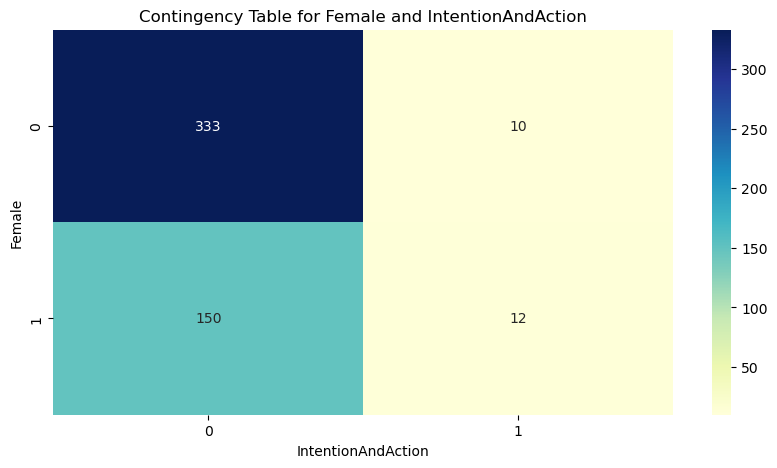


Chi-Square Test for 18-35 across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.0521, p-value: 0.3050


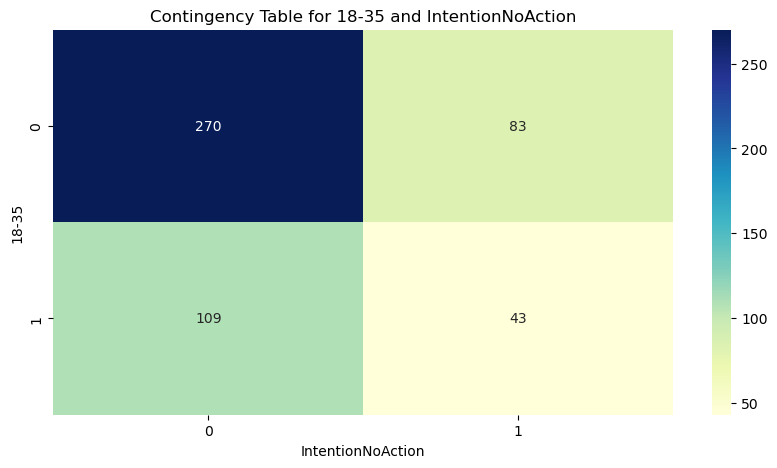

Group: NoIntentionNoAction
Chi-Square Statistic: 0.4178, p-value: 0.5180


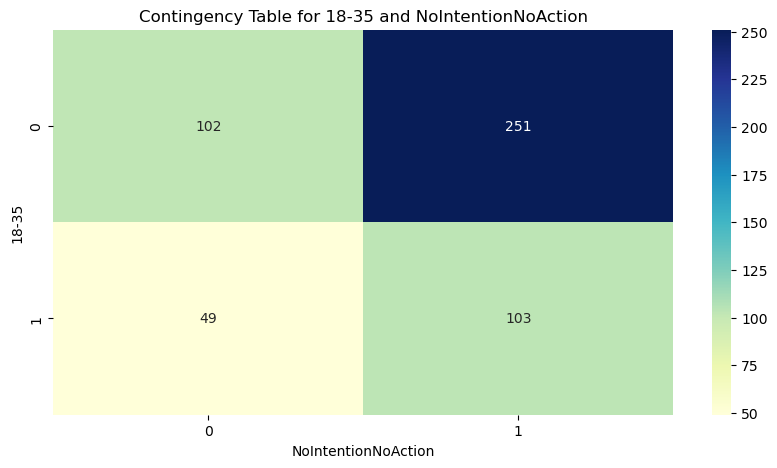

Group: IntentionAndAction
Chi-Square Statistic: 0.2843, p-value: 0.5939


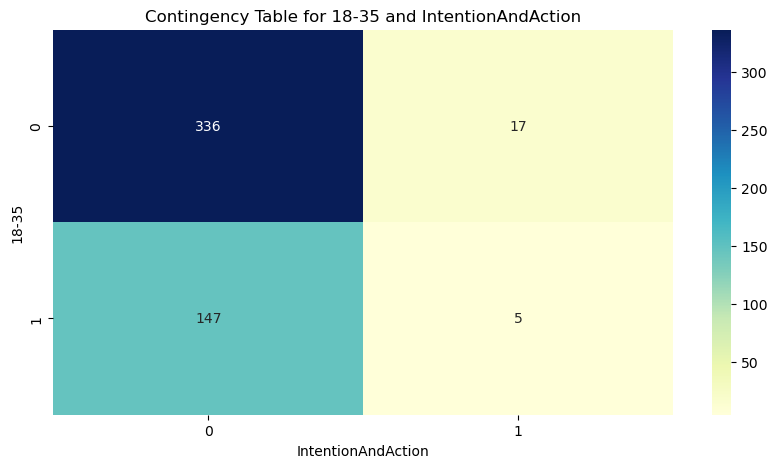


Chi-Square Test for White across groups:
Group: IntentionNoAction
Chi-Square Statistic: 3.8492, p-value: 0.0498


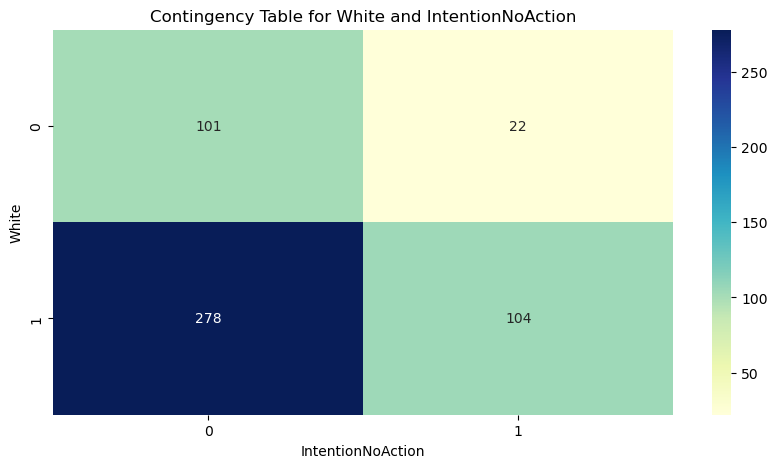

Group: NoIntentionNoAction
Chi-Square Statistic: 0.2661, p-value: 0.6059


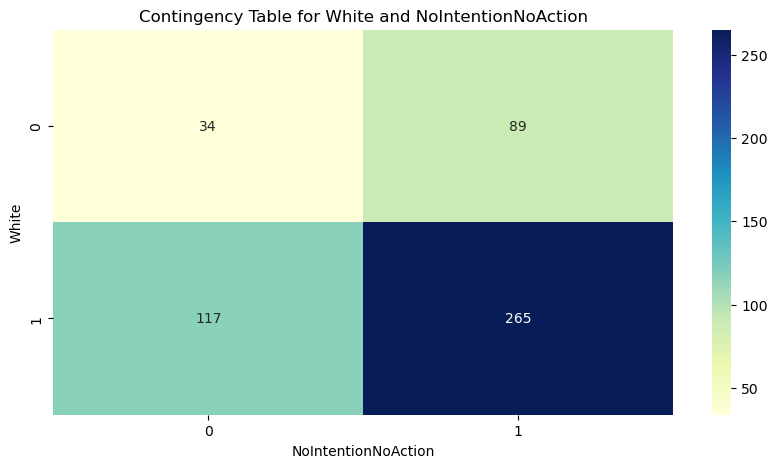

Group: IntentionAndAction
Chi-Square Statistic: 9.7296, p-value: 0.0018


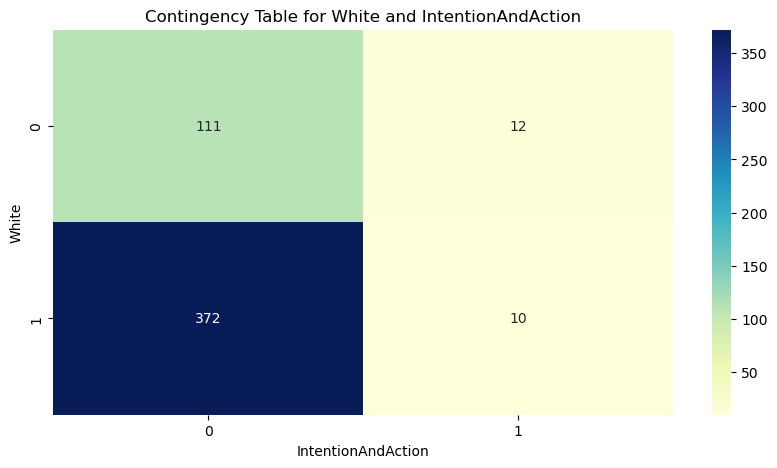


Chi-Square Test for Black / African American across groups:
Group: IntentionNoAction
Chi-Square Statistic: 1.3283, p-value: 0.2491


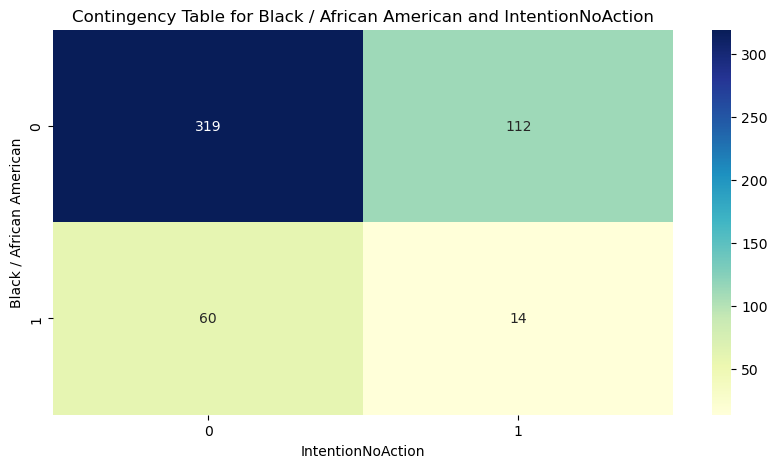

Group: NoIntentionNoAction
Chi-Square Statistic: 0.0297, p-value: 0.8632


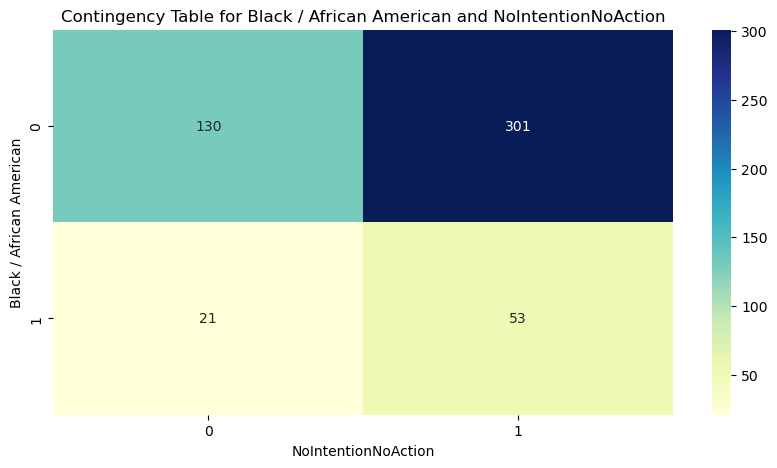

Group: IntentionAndAction
Chi-Square Statistic: 4.0789, p-value: 0.0434


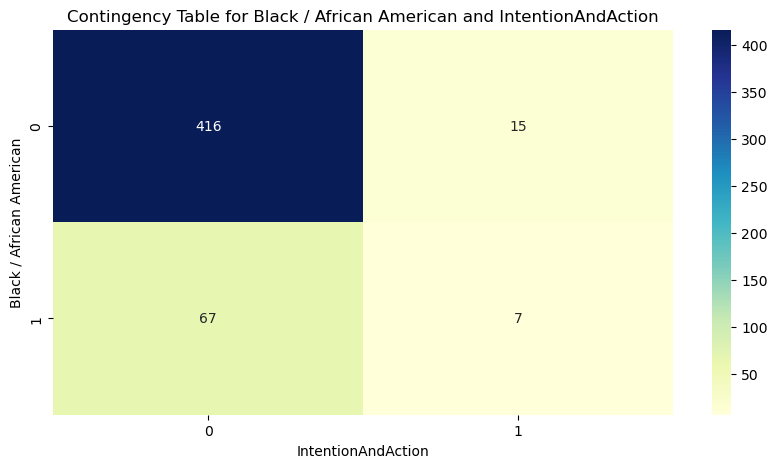


Chi-Square Test for USH across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.4677, p-value: 0.4940


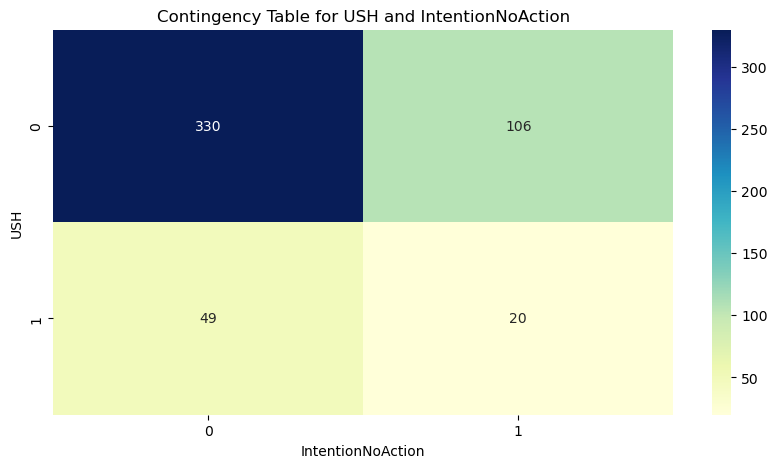

Group: NoIntentionNoAction
Chi-Square Statistic: 0.6589, p-value: 0.4170


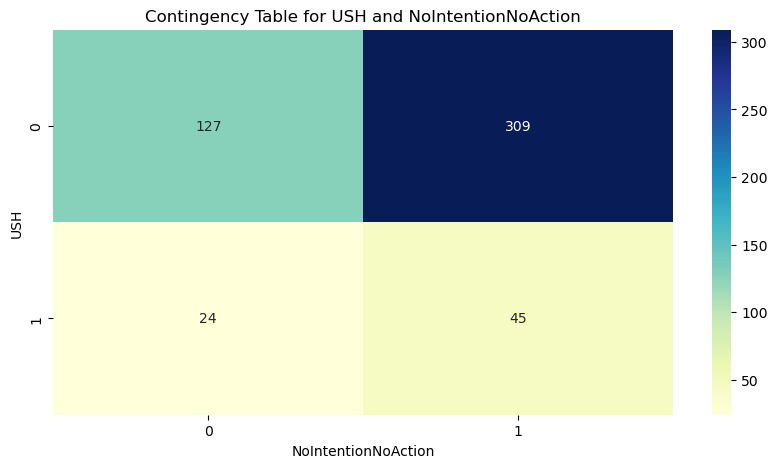

Group: IntentionAndAction
Chi-Square Statistic: 0.1031, p-value: 0.7481


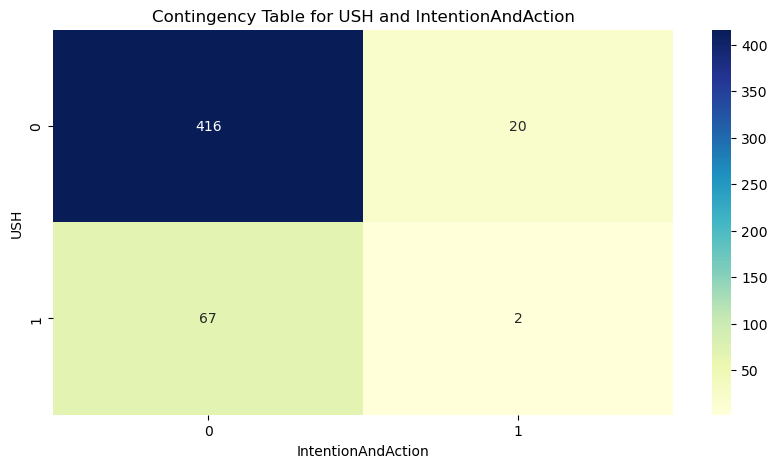


Chi-Square Test for Parental Status across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.2709, p-value: 0.6028


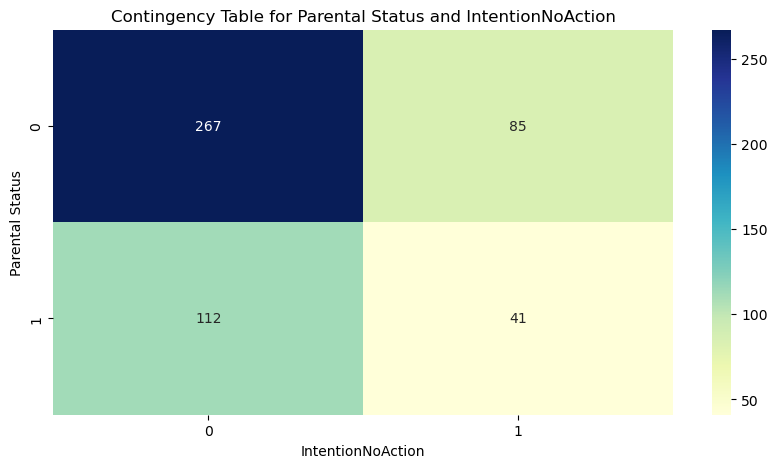

Group: NoIntentionNoAction
Chi-Square Statistic: 1.4799, p-value: 0.2238


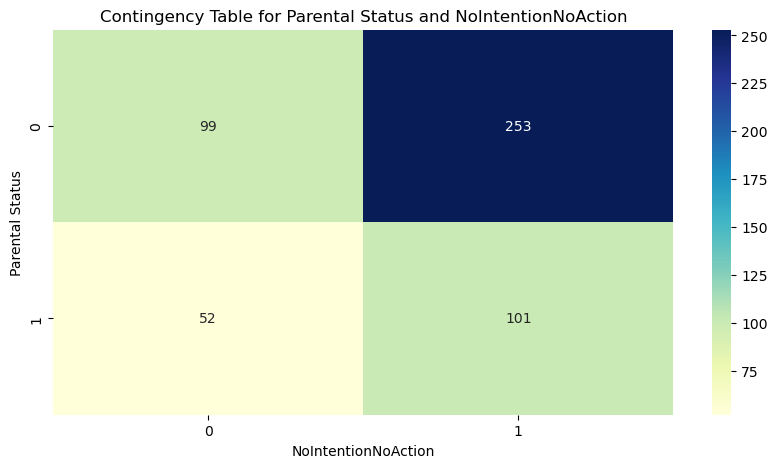

Group: IntentionAndAction
Chi-Square Statistic: 1.8083, p-value: 0.1787


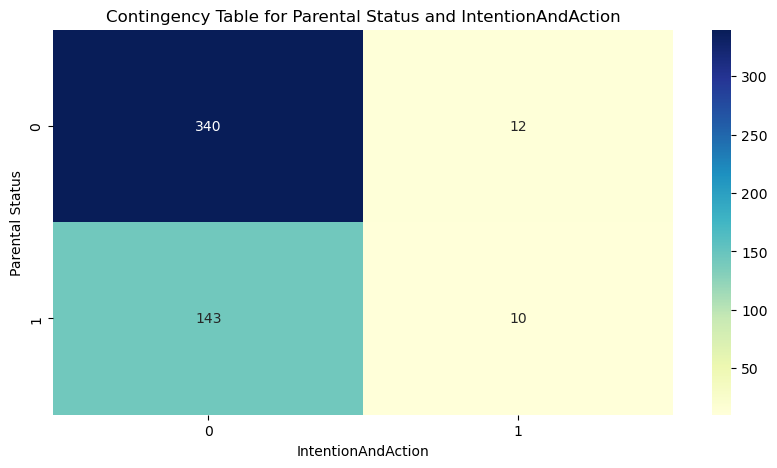


Chi-Square Test for Education across groups:
Group: IntentionNoAction
Chi-Square Statistic: 0.9533, p-value: 0.8126


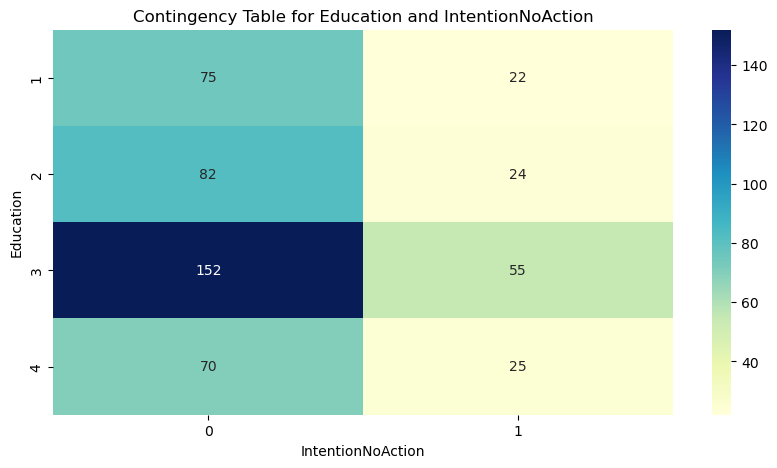

Group: NoIntentionNoAction
Chi-Square Statistic: 4.6103, p-value: 0.2027


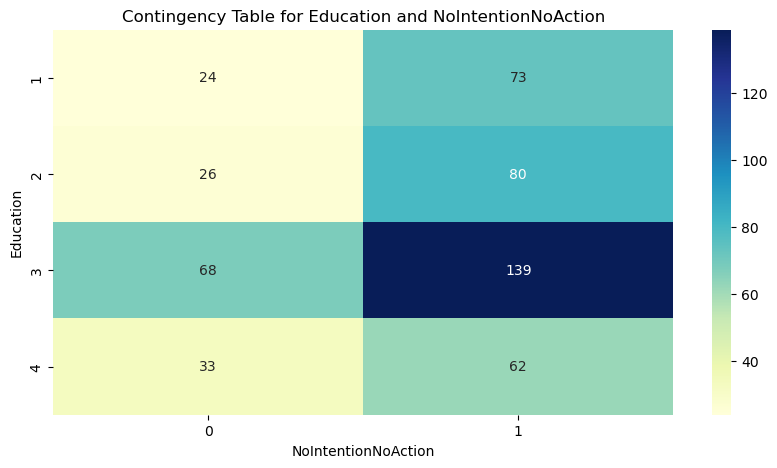

Group: IntentionAndAction
Chi-Square Statistic: 5.3013, p-value: 0.1510


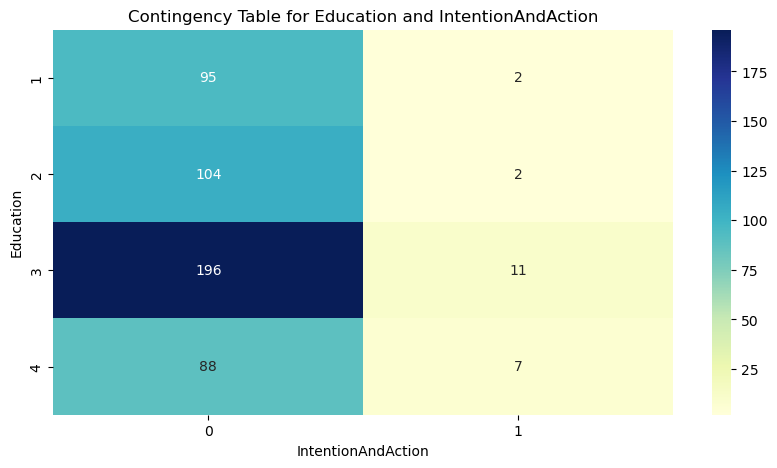


Chi-Square Test for Climate Change Impact across groups:
Group: IntentionNoAction
Chi-Square Statistic: 28.3375, p-value: 0.0000


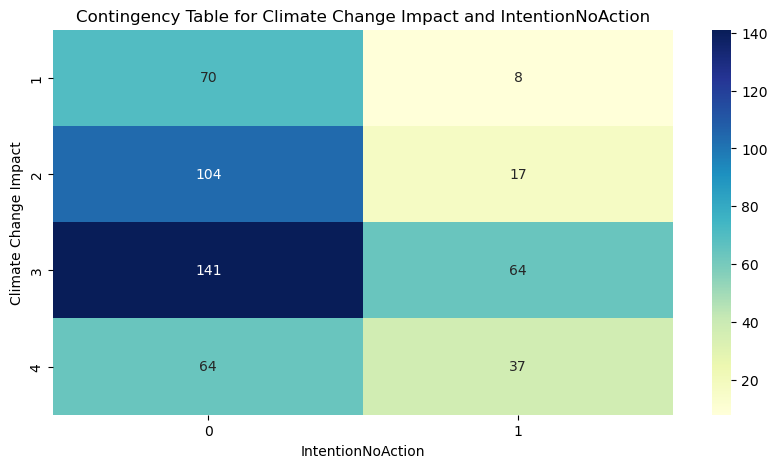

Group: NoIntentionNoAction
Chi-Square Statistic: 47.2349, p-value: 0.0000


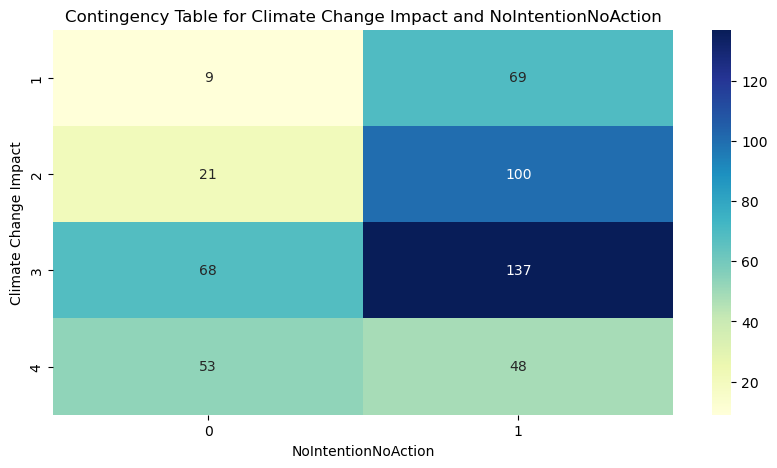

Group: IntentionAndAction
Chi-Square Statistic: 33.6100, p-value: 0.0000


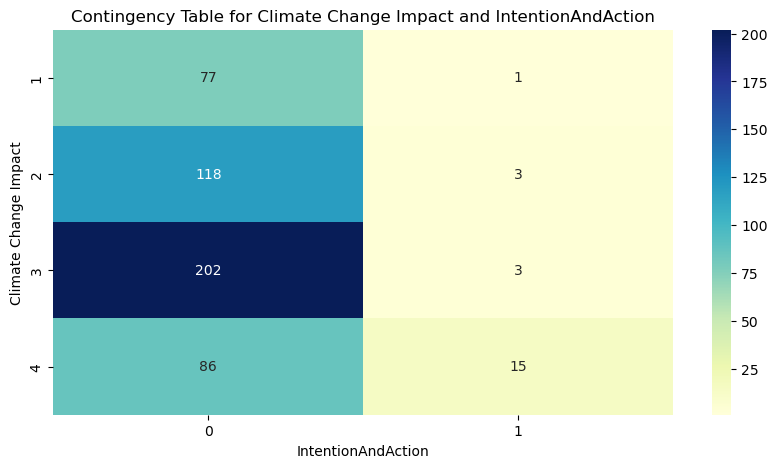


Chi-Square Test for Level of action across groups:
Group: IntentionNoAction
Chi-Square Statistic: 23.1537, p-value: 0.0000


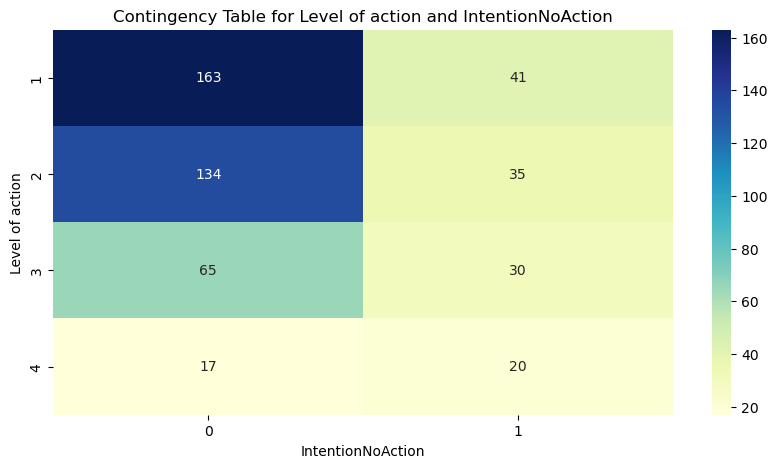

Group: NoIntentionNoAction
Chi-Square Statistic: 20.6114, p-value: 0.0001


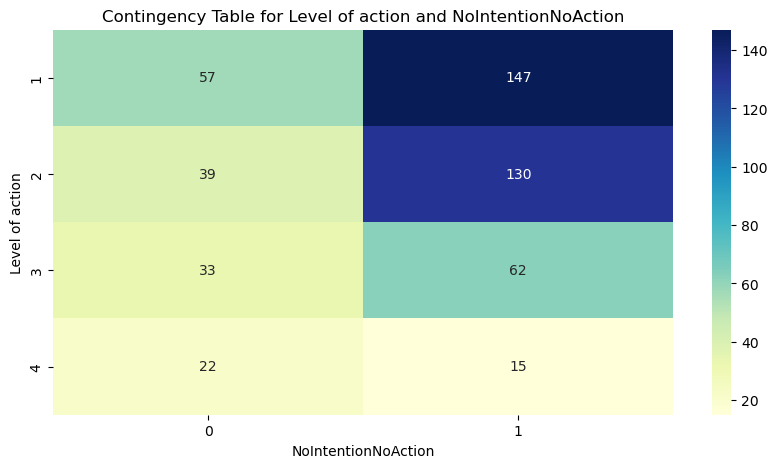

Group: IntentionAndAction
Chi-Square Statistic: 6.2033, p-value: 0.1021


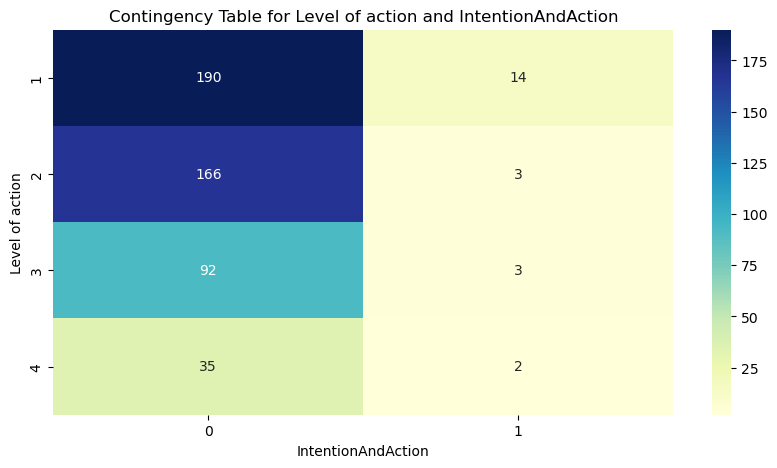

In [8]:
# Define the groups as columns
groups = ['IntentionNoAction', 'NoIntentionNoAction', 'IntentionAndAction']

# Define the sociodemographic variables
socio_vars = ['Female', '18-35', "White", "Black / African American", "USH", "Parental Status", 'Education', 'Climate Change Impact', 'Level of action']

# Dictionary to store results
results = {}

for var in socio_vars:
    print(f"\nChi-Square Test for {var} across groups:")
    for group in groups:
        # Create contingency table for each group column
        contingency_table = pd.crosstab(df[var], df[group])
        
        # Perform Chi-Square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Check expected frequencies
        if (expected < 5).any():
            print(f"Warning: Low expected frequencies in contingency table for {var} and {group}")
        
        # Store results
        results[(var, group)] = {
            'Chi-Square Statistic': chi2_stat,
            'p-value': p_value
        }
        
        # Print results
        print(f'Group: {group}')
        print(f'Chi-Square Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}')
        
        # Plot the contingency table
        plt.figure(figsize=(10, 5))
        sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
        plt.title(f'Contingency Table for {var} and {group}')
        plt.ylabel(f'{var}')
        plt.xlabel(f'{group}')
        plt.show()


### Proportions of each variable within each group:

In [10]:
# Dictionary to store proportions results
proportions_results = {}

for var in socio_vars:
    for group in groups:
        # Filter the DataFrame for the current group
        group_df = df[df[group] == 1]
        
        # Calculate the frequency distribution for the current variable
        frequency_dist = group_df[var].value_counts(normalize=True)
        
        # Store the proportions
        proportions_results[(var, group)] = frequency_dist

# Print proportions results
print("\nProportions of each variable within each group:")
for key, value in proportions_results.items():
    print(f"\nProportions for {key[0]} and {key[1]}:")
    print(value)


Proportions of each variable within each group:

Proportions for Female and IntentionNoAction:
0    0.730159
1    0.269841
Name: Female, dtype: float64

Proportions for Female and NoIntentionNoAction:
0    0.675141
1    0.324859
Name: Female, dtype: float64

Proportions for Female and IntentionAndAction:
1    0.545455
0    0.454545
Name: Female, dtype: float64

Proportions for 18-35 and IntentionNoAction:
0    0.65873
1    0.34127
Name: 18-35, dtype: float64

Proportions for 18-35 and NoIntentionNoAction:
0    0.70904
1    0.29096
Name: 18-35, dtype: float64

Proportions for 18-35 and IntentionAndAction:
0    0.772727
1    0.227273
Name: 18-35, dtype: float64

Proportions for White and IntentionNoAction:
1    0.825397
0    0.174603
Name: White, dtype: float64

Proportions for White and NoIntentionNoAction:
1    0.748588
0    0.251412
Name: White, dtype: float64

Proportions for White and IntentionAndAction:
0    0.545455
1    0.454545
Name: White, dtype: float64

Proportions for Black